In [76]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
with open('C:/Users/shaha/Desktop/Springboard/Unit26/ultimate_challenge/logins.json') as json_file:
    data=json.load(json_file)
df=pd.DataFrame(data)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
print(df.shape)
df.dtypes

(93142, 1)


login_time    object
dtype: object

In [4]:
for i in range(93142):
    df.iloc[i,0]=datetime.strptime(df.iloc[i,0], '%Y-%m-%d %H:%M:%S')

In [5]:
df=df.sort_values(by=['login_time'])
df=df.reset_index()
df=df.drop('index', axis=1)
df.head(10)

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37
5,1970-01-01 20:21:41
6,1970-01-01 20:26:05
7,1970-01-01 20:26:21
8,1970-01-01 20:31:03
9,1970-01-01 20:34:46


In [6]:
df['Number']=1
df.head()

,login_time,Number
0,1970-01-01 20:12:16,1
1,1970-01-01 20:13:18,1
2,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:16:37,1


In [7]:
df=df.set_index('login_time')
df.head()

,Number
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [8]:
new_df=df['Number'].resample('15Min').sum()
new_df.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: Number, dtype: int64

In [9]:
df_15=pd.DataFrame({'Each 15 minutes': new_df.values}, index=new_df.index)
df_hour=df['Number'].resample('60Min').sum()
df_day=df['Number'].resample('B').sum()
df_week=df['Number'].resample('W').sum()
df_month=df['Number'].resample('M').sum()
dfh=pd.DataFrame({'Each hour': df_hour.values, 'Day': df_hour.index.day, 'Month': df_hour.index.month}, index=df_hour.index)
dfd=pd.DataFrame({'Each day': df_day.values, 'Day': df_day.index.day, 'Month': df_day.index.month}, index=df_day.index)
dfw=pd.DataFrame({'Each week': df_week.values, 'Month': df_week.index.month}, index=df_week.index)
dfm=pd.DataFrame({'Each Month': df_month.values}, index=df_month.index)

In [10]:
df_15.head()

,Each 15 minutes
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


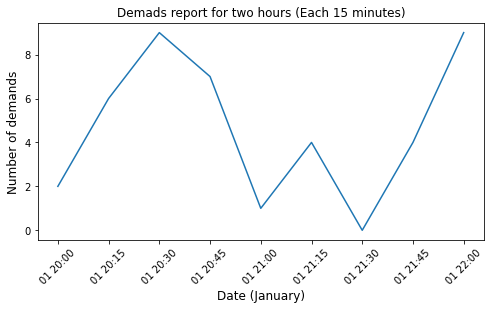

In [11]:
plt.figure(figsize=(8,4))
a=df_15[:9]
plt.plot(a.index,a['Each 15 minutes'])
plt.title('Demads report for two hours (Each 15 minutes)')
plt.xlabel('Date (January)', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

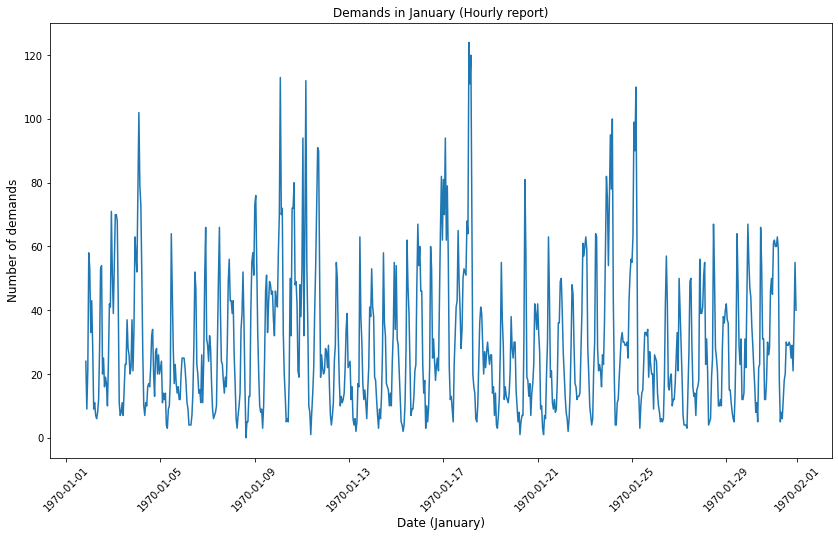

In [12]:
plt.figure(figsize=(14,8))
a=dfh[(dfh['Month']==1) & (dfh['Day']>=1)]
plt.plot(a.index,a['Each hour'])
plt.title('Demands in January (Hourly report)')
plt.xlabel('Date (January)', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

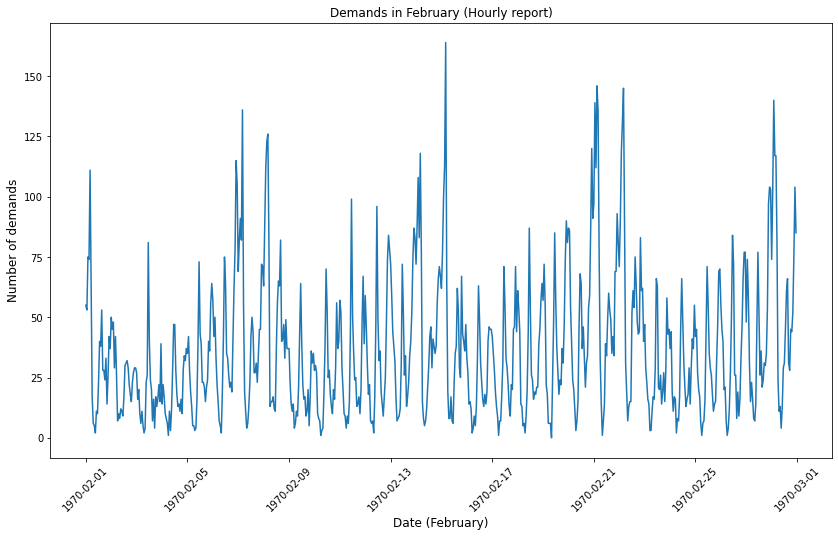

In [13]:
plt.figure(figsize=(14,8))
a=dfh[(dfh['Month']==2) & (dfh['Day']>=1)]
plt.plot(a.index,a['Each hour'])
plt.title('Demands in February (Hourly report)')
plt.xlabel('Date (February)', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

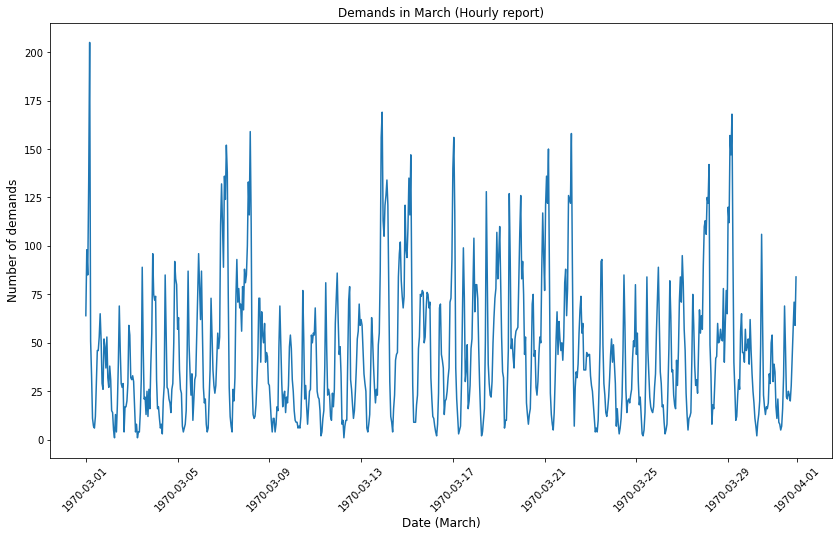

In [14]:
plt.figure(figsize=(14,8))
a=dfh[(dfh['Month']==3) & (dfh['Day']>=1)]
plt.plot(a.index,a['Each hour'])
plt.title('Demands in March (Hourly report)')
plt.xlabel('Date (March)', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

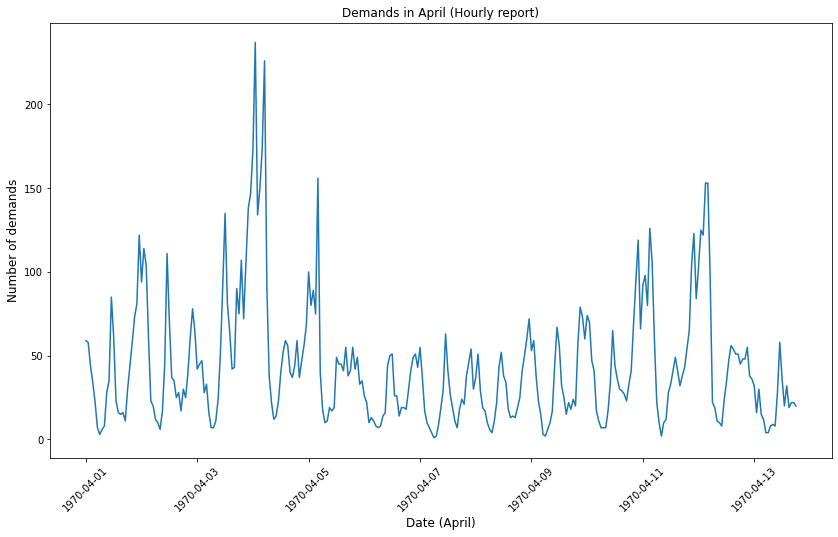

In [15]:
plt.figure(figsize=(14,8))
a=dfh[(dfh['Month']==4) & (dfh['Day']>=1)]
plt.plot(a.index,a['Each hour'])
plt.title('Demands in April (Hourly report)')
plt.xlabel('Date (April)', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

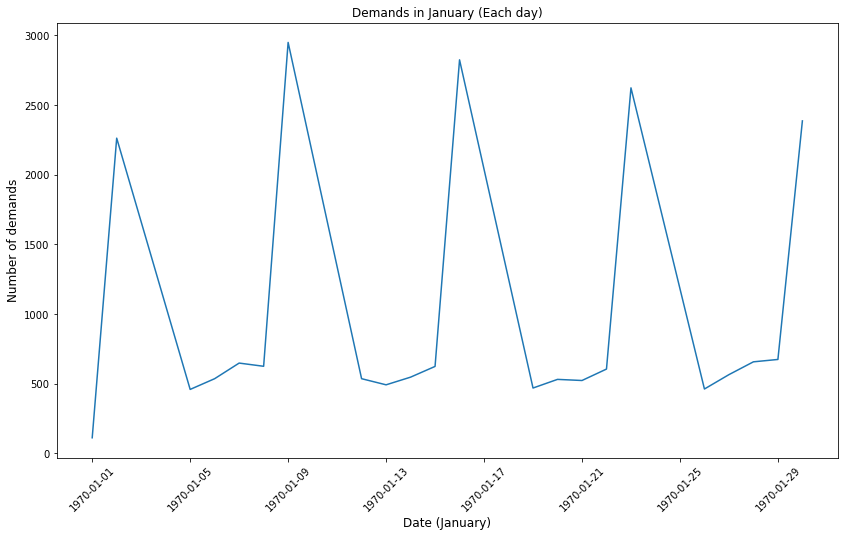

In [16]:
plt.figure(figsize=(14,8))
a=dfd[(dfd['Month']==1)]
plt.plot(a.index,a['Each day'])
plt.title('Demands in January (Each day)')
plt.xlabel('Date (January)', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

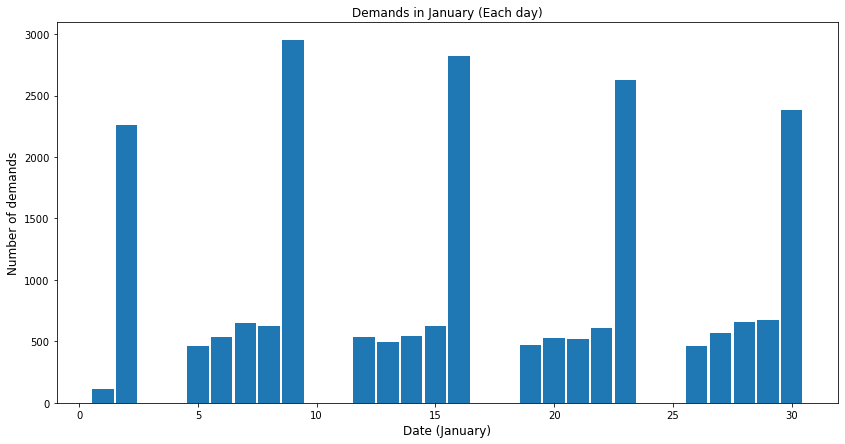

In [17]:
plt.figure(figsize=(14,7))
a=dfd[(dfd['Month']==1)]
plt.bar(a['Day'],a['Each day'], width=0.9)
plt.title('Demands in January (Each day)')
plt.xlabel('Date (January)', size='large')
plt.ylabel('Number of demands', size='large')
#plt.xticks(rotation=45)
plt.show()

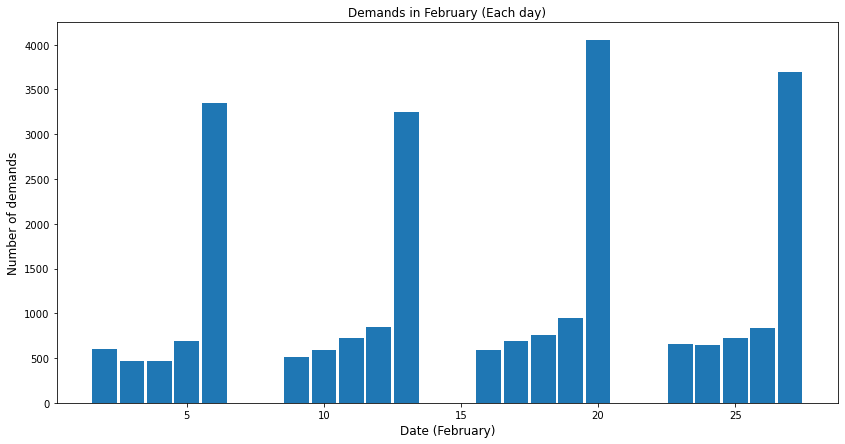

In [18]:
plt.figure(figsize=(14,7))
a=dfd[(dfd['Month']==2)]
plt.bar(a['Day'],a['Each day'], width=0.9)
plt.title('Demands in February (Each day)')
plt.xlabel('Date (February)', size='large')
plt.ylabel('Number of demands', size='large')
#plt.xticks(rotation=45)
plt.show()

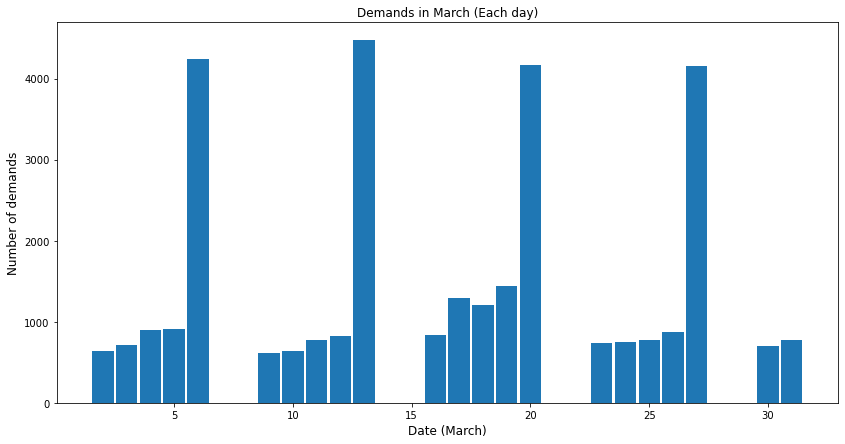

In [19]:
plt.figure(figsize=(14,7))
a=dfd[(dfd['Month']==3)]
plt.bar(a['Day'],a['Each day'], width=0.9)
plt.title('Demands in March (Each day)')
plt.xlabel('Date (March)', size='large')
plt.ylabel('Number of demands', size='large')
#plt.xticks(rotation=45)
plt.show()

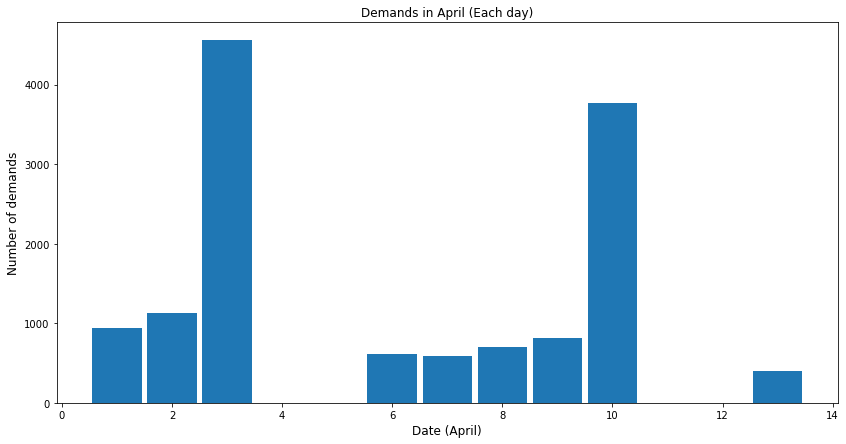

In [20]:
plt.figure(figsize=(14,7))
a=dfd[(dfd['Month']==4)]
plt.bar(a['Day'],a['Each day'], width=0.9)
plt.title('Demands in April (Each day)')
plt.xlabel('Date (April)', size='large')
plt.ylabel('Number of demands', size='large')
#plt.xticks(rotation=45)
plt.show()

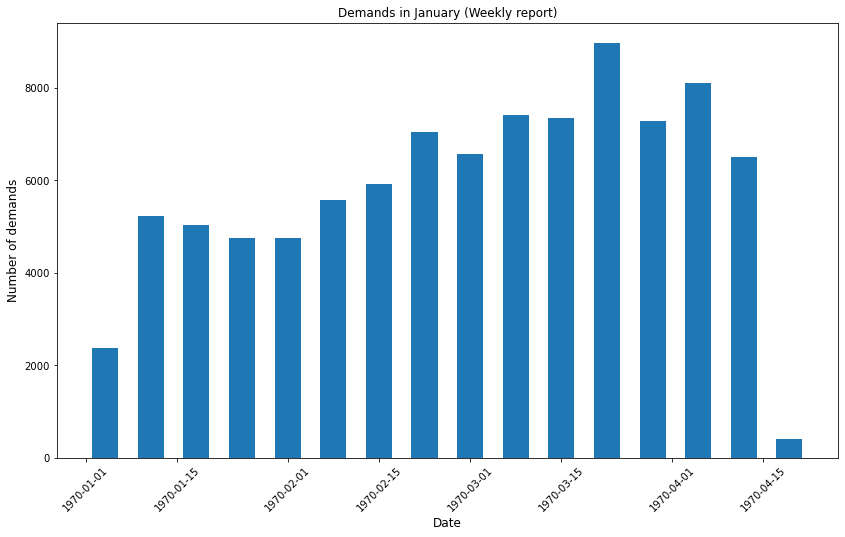

In [21]:
plt.figure(figsize=(14,8))
plt.bar(dfw.index,dfw['Each week'], width=4)
plt.title('Demands in January (Weekly report)')
plt.xlabel('Date', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

In [22]:
dfm['Month']='January'
for i in range(4):
    if i==1:
        dfm.iloc[i,1]='February'
    if i==2:
        dfm.iloc[i,1]='March'
    if i==3:
        dfm.iloc[i,1]='April'

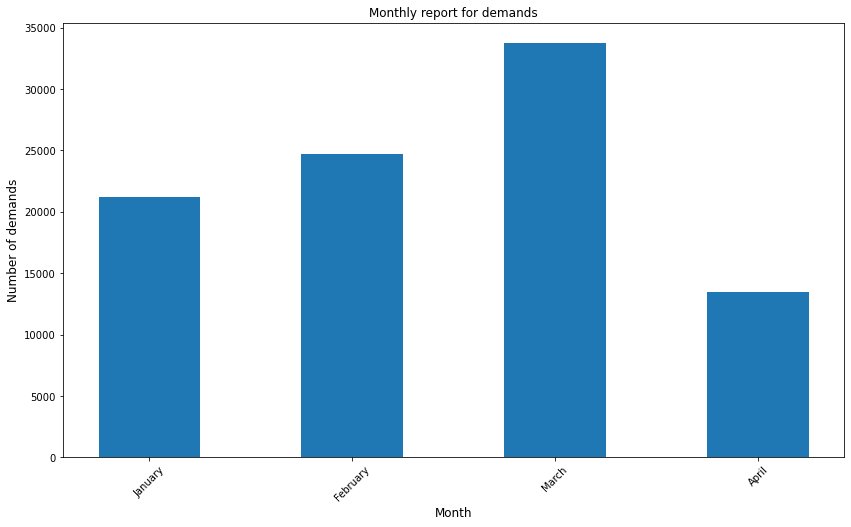

In [23]:
plt.figure(figsize=(14,8))
plt.bar(dfm['Month'],dfm['Each Month'], width=0.5)
plt.title('Monthly report for demands')
plt.xlabel('Month', size='large')
plt.ylabel('Number of demands', size='large')
plt.xticks(rotation=45)
plt.show()

### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

### Answer: 
I think the are any methods or metrics to study this success. According to my idea there can be two methods for this purpose:
The first method is related to toll stations. With a simple data collcetion it is possblie to measure number of taxi drivers and figure out the new condition for both ways. I think it is possible to monitor the number of taxis for both ways and make comparision between new result and previous result. The second method is regading transportation department for each city. It is possible to set up a procedure or method for transportation departments of two cities to track the license plates of taxis. So after a period of time the data collection based on this procedure can be analyzed. Therefore they can figure out how the new condition is and they can commpare the new case with previous case to evaluate the proposed experiment.

# 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
# a) how you will implement the experiment
# b) what statistical test(s) you will conduct to verify the significance of the  observation
# c) how you would interpret the results and provide recommendations to the cityoperations team along with any caveats.


### Answer:
For a specifi period of time (For exam 1 month), two types of data collection should be performed in toll stations for both ways:
1-Data collection of taxis which are commuting for both ways with toll that the taxi driver has to pay the toll. For this period of time the licence plates of all taxis which are commuting should be recorded. It is possible to record the license plate number by camera.
2-For next case, data collection of taxis should be performed in toll station with repaying. In other words, toll payment is compensated by government. Again for the same period of time like previous case, the license plates of taxis are coreded in toll stations.
After these experiment, it is possible to make comparison between two cases.
a) According to my comment, we can have two methods and for each method license plate should be chekced by the camera and recorded in the memory of the monitoring system. After 30 days, we can extract the data from the system and convert it to datasets to have comparison.
b) I propose Null hypothesis for this research. At first, make normal distributions for both data sets by aclculation of mean value based on Central Limit Theorem (CLT). So There are two normal distributions, let's calculate the difference of mean values of two normal distribution lists. In next step extract two lists from distributions and every list inluces many components (like 5000). Each component is mean from random slection of the normal disribution with replacement. So each list inlcudes 5000 thousand of mean values accrording to random selection. Now we should make the difference of between these lists based on random selection. In next step, make a ratio for this analysis which means difference of mean values between two lists selected by random choice divided by difference of mean values of the normal distributions. In other words, this ratio is p value. If p is less than 0.05 so we can reject the Null hypothesis to make decision regarding this statistical research.
c) According to the result of the Null hypothesis, we can judge about the effects of the proposed plan. If we can reject the Null hypothesis, we conclude the toll reduction causes the commuting bewteen two cities and consequently it encourages taxi drivers to travel to different city. So the city operations team will be informed based on this result. On the other hand; if Null hopothesis can not be rejected, it is conculded the toll reduction doesn't affect commuting. Therefore, city operation team will be updated by this report. 

In [24]:
with open ('C:/Users/shaha/Desktop/Springboard/Unit26/ultimate_challenge/ultimate_data_challenge.json') as json_file2:
    data2=json.load(json_file2)
df2=pd.DataFrame(data2)
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
df2.shape

(50000, 12)

In [26]:
#Converting culmns of signup_date and last_trip_date to satandard format

In [27]:
from tqdm import tqdm
for i in tqdm(range(50000)):
    df2.iloc[i,2]=datetime.strptime(df2.iloc[i,2], '%Y-%m-%d')

100%|██████████| 50000/50000 [01:47<00:00, 463.50it/s]


In [28]:
for i in range(50000):
    df2.iloc[i,5]=datetime.strptime(df2.iloc[i,5], '%Y-%m-%d')

### Cleaning

In [29]:
df2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [30]:
df2.isnull().sum().sort_values()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
phone                      396
avg_rating_of_driver      8122
dtype: int64

In [32]:
df2['avg_rating_by_driver'].fillna(statistics.mode(df2['avg_rating_by_driver']), inplace=True)

In [33]:
df2.isnull().sum().sort_values()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver         0
phone                      396
avg_rating_of_driver      8122
dtype: int64

In [35]:
df2['phone'].fillna(statistics.mode(df2['phone']), inplace=True)
df2.isnull().sum().sort_values()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8122
dtype: int64

In [37]:
#Checking the null values for making sure
df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean(), inplace=True)
df2.isnull().sum().sort_values()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

So the data is clean now.

### Exploratory Data Analysi

In [38]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.779050
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445974
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [39]:
df2['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [40]:
df_King=df2[df2['city']=="King's Landing"]
df_Astapor=df2[df2['city']=="Astapor"]
df_Winterfell=df2[df2['city']=="Winterfell"]

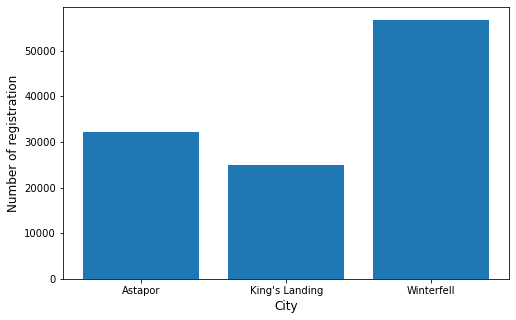

In [41]:
plt.figure(figsize=(8,5))
#df2_temp=df2
#df2_temp['City']=df2_temp['city']
df2_sum=df2.groupby('city').sum()
plt.bar(df2_sum.index, df2_sum['trips_in_first_30_days'])
plt.xlabel('City', size='large')
plt.ylabel('Number of registration', size='large')
plt.show()

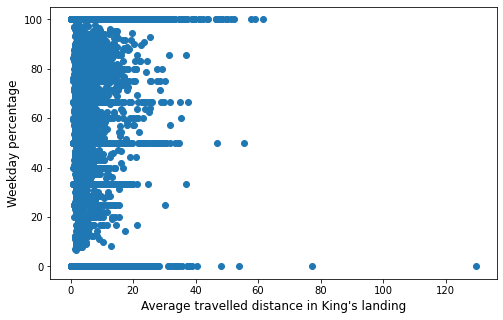

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(df_King['avg_dist'], df_King['weekday_pct'])
plt.xlabel("Average travelled distance in King's landing", size='large')
plt.ylabel('Weekday percentage', size='large')
plt.show()

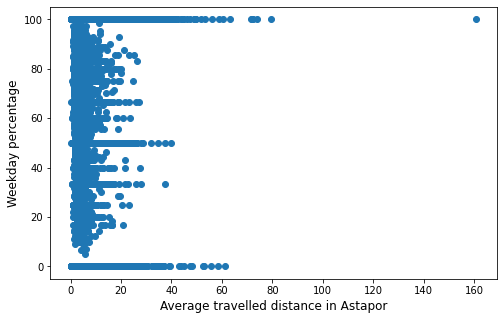

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(df_Astapor['avg_dist'], df_Astapor['weekday_pct'])
plt.xlabel('Average travelled distance in Astapor', size='large')
plt.ylabel('Weekday percentage', size='large')
plt.show()

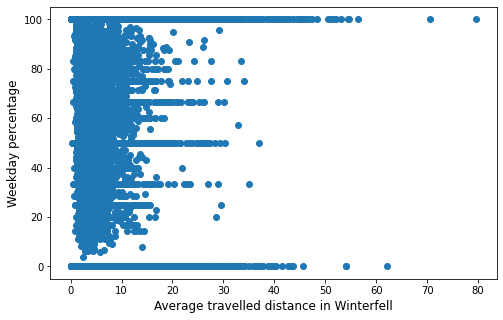

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(df_Winterfell['avg_dist'], df_Winterfell['weekday_pct'])
plt.xlabel('Average travelled distance in Winterfell', size='large')
plt.ylabel('Weekday percentage', size='large')
plt.show()

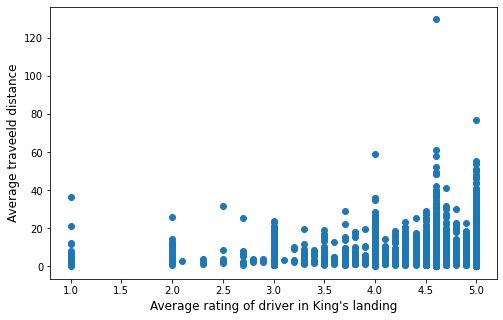

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(df_King['avg_rating_of_driver'], df_King['avg_dist'])
plt.xlabel("Average rating of driver in King's landing", size='large')
plt.ylabel('Average traveeld distance', size='large')
plt.show()

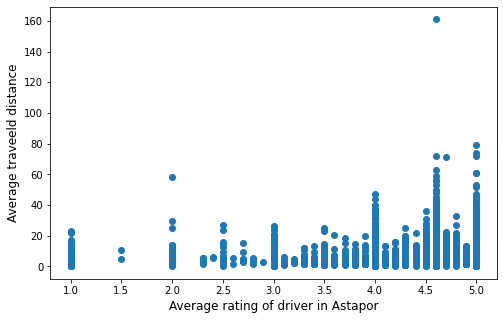

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(df_Astapor['avg_rating_of_driver'], df_Astapor['avg_dist'])
plt.xlabel("Average rating of driver in Astapor", size='large')
plt.ylabel('Average traveeld distance', size='large')
plt.show()

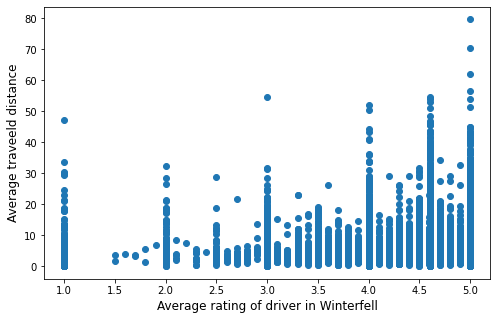

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(df_Winterfell['avg_rating_of_driver'], df_Winterfell['avg_dist'])
plt.xlabel("Average rating of driver in Winterfell", size='large')
plt.ylabel('Average traveeld distance', size='large')
plt.show()

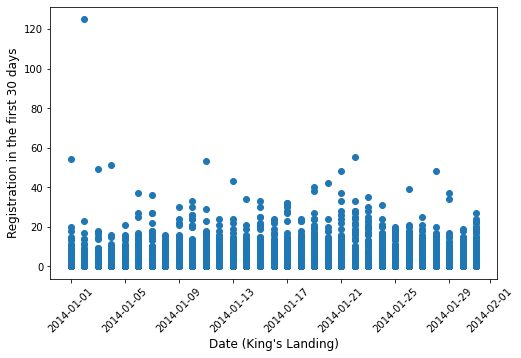

In [150]:
plt.figure(figsize=(8,5))
plt.scatter(df_King.sort_values("signup_date")['signup_date'], df_King.sort_values("signup_date")['trips_in_first_30_days'])
plt.xlabel("Date (King's Landing)", size='large')
plt.ylabel('Registration in the first 30 days', size='large')
plt.xticks(rotation=45)
plt.show()

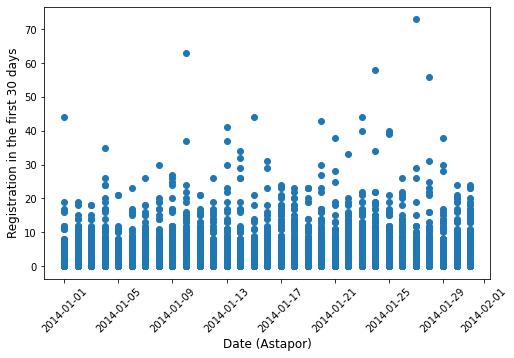

In [151]:
plt.figure(figsize=(8,5))
plt.scatter(df_Astapor.sort_values("signup_date")['signup_date'], 
            df_Astapor.sort_values("signup_date")['trips_in_first_30_days'])
plt.xlabel("Date (Astapor)", size='large')
plt.ylabel('Registration in the first 30 days', size='large')
plt.xticks(rotation=45)
plt.show()

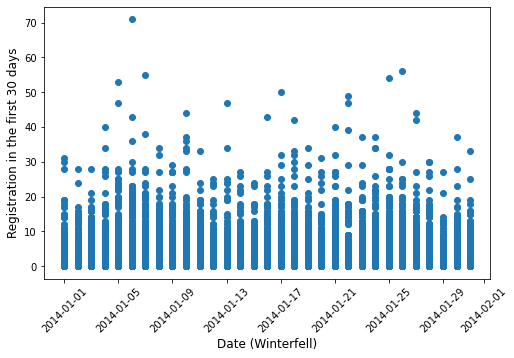

In [152]:
plt.figure(figsize=(8,5))
plt.scatter(df_Winterfell.sort_values("signup_date")['signup_date'], 
            df_Winterfell.sort_values("signup_date")['trips_in_first_30_days'])
plt.xlabel("Date (Winterfell)", size='large')
plt.ylabel('Registration in the first 30 days', size='large')
plt.xticks(rotation=45)
plt.show()

### Modelling

In [48]:
df2['signup_day']=1
for i in range(50000):
    df2.iloc[i,12]=df2.iloc[i,2].day

In [49]:
df2['last_trip_month']=1; df2['last_trip_day']=1;
for i in range(50000):
    df2.iloc[i,13]=df2.iloc[i,5].month
for i in range(50000):
    df2.iloc[i,14]=df2.iloc[i,5].day

In [50]:
df2=df2.drop(['signup_date','last_trip_date'], axis=1)

According to the assumption of the research proposed by Ultimate, the last 30 days of user's signup is the criterion to make decision about User's status. So we should find the last 30 days of the dataset.

In [51]:
df2['last_trip_month'].max()

7

In [52]:
df2[df2['last_trip_month']==7]['last_trip_day'].max()

1

So we observe that the the maximum month is 7 (July) and maximum day 1. Therefore the last date for this data frame is July 1st. Consequently last 30 days should be June 1st to July 1st or 06/01-07/01.

In [53]:
df2['user status']='Not active'

In [54]:
for i in range(50000):
    if df2.iloc[i,11]>=6:
        df2.iloc[i,13]='Active'

# What fraction of the observed users were retained?

In [87]:
len(df2[df2['last_trip_month']>=6])/len(df2)

0.37608

## The fraction of the observed user is 0.376

In [94]:
#Generation of dummy variables for data frame
df_dummies=pd.get_dummies(df2, columns=['city', 'phone','ultimate_black_user','user status'], prefix='C')

In [95]:
df_dummies

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,signup_day,last_trip_month,last_trip_day,C_Astapor,C_King's Landing,C_Winterfell,C_Android,C_iPhone,C_False,C_True,C_Active,C_Not active
0,4,4.700000,1.10,15.4,46.2,3.67,5.0,25,6,17,0,1,0,0,1,0,1,1,0
1,0,5.000000,1.00,0.0,50.0,8.26,5.0,29,5,5,1,0,0,1,0,1,0,0,1
2,3,4.300000,1.00,0.0,100.0,0.77,5.0,6,1,7,1,0,0,0,1,1,0,0,1
3,9,4.600000,1.14,20.0,80.0,2.36,4.9,10,6,29,0,1,0,0,1,0,1,1,0
4,14,4.400000,1.19,11.8,82.4,3.13,4.9,27,3,15,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,100.0,5.63,4.2,25,6,5,0,1,0,0,1,1,0,1,0
49996,1,4.601559,1.00,0.0,0.0,0.00,4.0,24,1,25,1,0,0,0,1,1,0,0,1
49997,0,5.000000,1.00,0.0,100.0,3.86,5.0,31,5,22,0,0,1,1,0,0,1,0,1
49998,2,3.000000,1.00,0.0,100.0,4.58,3.5,14,1,15,1,0,0,0,1,1,0,0,1


In [96]:
df_dummies=df_dummies.drop(['signup_day', 'last_trip_month', 'last_trip_day','C_Not active'], axis=1)

In [153]:
#Definition of data for training and prediction
X=df_dummies[df_dummies.index<49000].drop('C_Active', axis=1).values
y=df_dummies[df_dummies.index<49000]['C_Active'].values
X_ML=df_dummies[df_dummies.index>=49000].drop('C_Active', axis=1).values
y_ML=df_dummies[df_dummies.index>=49000]['C_Active'].values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
#Ridge model
for alpha in [0.1, 1, 10, 100, 1000]:
    model=Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print('alpha=',alpha,'  score=',model.score(X_test, y_test))

alpha= 0.1   score= 0.19048232539449927
alpha= 1   score= 0.19048252633599094
alpha= 10   score= 0.19048440254302434
alpha= 100   score= 0.19049054264511378
alpha= 1000   score= 0.18961620129715484


so alpha=100 is the best case

In [155]:
model=Ridge(alpha=100)
model.fit(X_train, y_train)
y_pred=model.predict(X_test).round()
print('Score=',model.score(X_test, y_test))
print(classification_report(y_test,y_pred))

Score= 0.19049054264511378
              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79      9170
         1.0       0.68      0.48      0.56      5530
         2.0       0.00      0.00      0.00         0

    accuracy                           0.72     14700
   macro avg       0.47      0.45      0.45     14700
weighted avg       0.71      0.72      0.70     14700



C:\Users\shaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


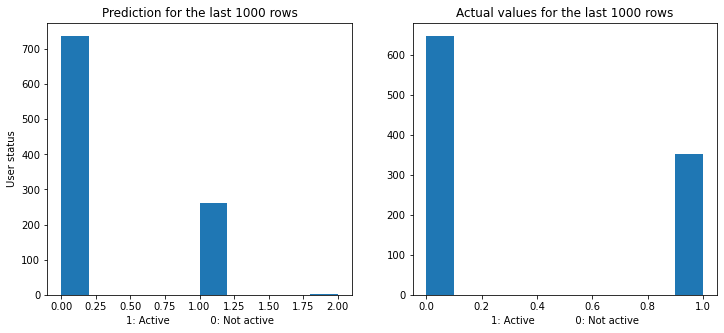

In [156]:
y_prediction=model.predict(X_ML)
y_prediction=y_prediction.round()
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for the last 1000 rows')
ax[1].set_title('Actual values for the last 1000 rows')
ax[0].set_xlabel('1: Active             0: Not active')
ax[1].set_xlabel('1: Active             0: Not active')
ax[0].hist(y_prediction)
ax[1].hist(y_ML)
ax[0].set_ylabel('User status')
plt.show()

In [157]:
#Linear Regression model
reg_model=LinearRegression()
reg_model.fit(X_train, y_train)
y_pred=reg_model.predict(X_test)
reg_model.score(X_test,y_test)

0.19048230291724755

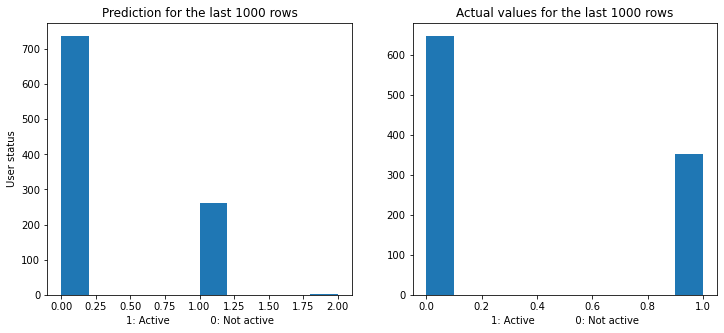

In [158]:
y_prediction=reg_model.predict(X_ML)
y_prediction=y_prediction.round()
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for the last 1000 rows')
ax[1].set_title('Actual values for the last 1000 rows')
ax[0].set_xlabel('1: Active             0: Not active')
ax[1].set_xlabel('1: Active             0: Not active')
ax[0].hist(y_prediction)
ax[1].hist(y_ML)
ax[0].set_ylabel('User status')
plt.show()

In [159]:
#GradientBoostingClassifier
for n_estimator in [10, 100, 200]:
    model=GradientBoostingClassifier(n_estimators=n_estimator)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print('n_estimator=',n_estimator, '  score=', model.score(X_test, y_test))

n_estimator= 10   score= 0.7581632653061224
n_estimator= 100   score= 0.7831972789115647
n_estimator= 200   score= 0.7830612244897959


So n_estimator=100

In [160]:
model=GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      9170
           1       0.74      0.66      0.70      5530

    accuracy                           0.78     14700
   macro avg       0.77      0.76      0.76     14700
weighted avg       0.78      0.78      0.78     14700



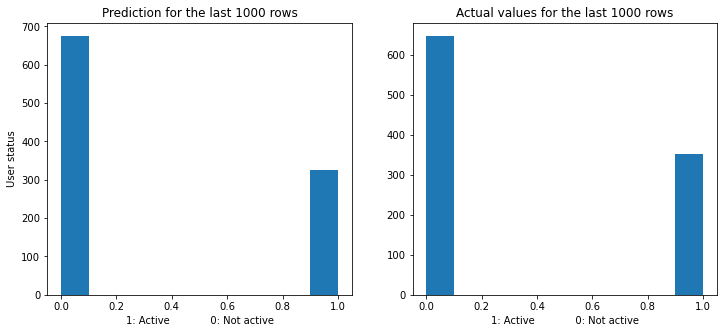

In [161]:
y_prediction=model.predict(X_ML)
y_prediction=y_prediction.round()
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for the last 1000 rows')
ax[1].set_title('Actual values for the last 1000 rows')
ax[0].set_xlabel('1: Active             0: Not active')
ax[1].set_xlabel('1: Active             0: Not active')
ax[0].hist(y_prediction)
ax[1].hist(y_ML)
ax[0].set_ylabel('User status')
plt.show()

In [162]:
#AdaBoostClassifier method
for n_estimator in [10, 100, 200, 250, 300]:
    model=AdaBoostClassifier(n_estimators=n_estimator)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print('n_estimator=',n_estimator, '  score=', model.score(X_test, y_test))

n_estimator= 10   score= 0.7682312925170068
n_estimator= 100   score= 0.7770748299319727
n_estimator= 200   score= 0.7800680272108843
n_estimator= 250   score= 0.7801360544217687
n_estimator= 300   score= 0.7793877551020408


So n_estimator=250 is the best case for AdaBoostClassifier

In [163]:
#AdaBoostClassifier method
model=AdaBoostClassifier(n_estimators=250)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9170
           1       0.74      0.65      0.69      5530

    accuracy                           0.78     14700
   macro avg       0.77      0.75      0.76     14700
weighted avg       0.78      0.78      0.78     14700



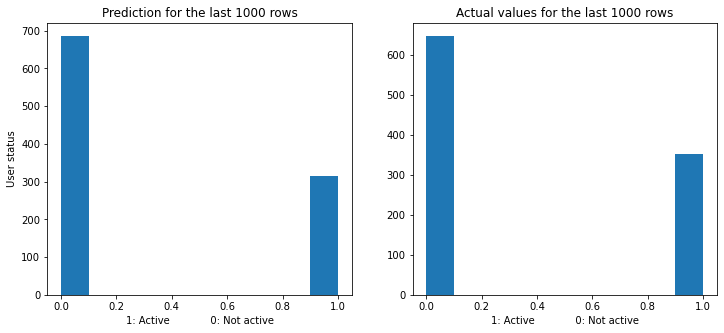

In [164]:
y_prediction=model.predict(X_ML)
y_prediction=y_prediction.round()
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for the last 1000 rows')
ax[1].set_title('Actual values for the last 1000 rows')
ax[0].set_xlabel('1: Active             0: Not active')
ax[1].set_xlabel('1: Active             0: Not active')
ax[0].hist(y_prediction)
ax[1].hist(y_ML)
ax[0].set_ylabel('User status')
plt.show()

## According to this analysis and performance evaluation based on X_test, y_test and X_ML, y_ML extracted from the datata set and score calculation, two models of AdaBoostClassifier and GradientBoostingClassifier have the best results.

In [165]:
model.feature_importances_

array([0.092, 0.064, 0.064, 0.128, 0.396, 0.148, 0.072, 0.008, 0.008,
       0.004, 0.008, 0.   , 0.   , 0.008])

In [166]:
features_importance=df_dummies[df_dummies.index>=49000].drop('C_Active', axis=1)
features_importance.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'C_Astapor', 'C_King's Landing', 'C_Winterfell', 'C_Android',
       'C_iPhone', 'C_False', 'C_True'],
      dtype='object')

In [167]:
features_importance.columns[[0,3,4,5]]

Index(['trips_in_first_30_days', 'surge_pct', 'weekday_pct', 'avg_dist'], dtype='object')

# According to this finding, 4 feature are more important rather than others, these features are:
### trips_in_first_30_days
### surge_pct
### weekday_pct
### avg_dist

### I think these features which are so important should be focused to improve the long term rider rentention.